In [95]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
data=pd.read_excel('../DATA/AAPLStocks.xlsx',parse_dates=True)
data.drop('Unnamed: 0', axis=1, inplace=True)
#data['date']= pd.to_datetime(data[['Year', 'month','day']])
#data.set_index('date', inplace=True)
#data.drop(['Year', 'month','day'], axis=1,inplace=True)
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,month,day
0,0.147936,0.148888,0.143180,0.147936,146440000,0.0,0,1998,1,26
1,0.146034,0.149839,0.144607,0.145558,112235200,0.0,0,1998,1,27
2,0.146034,0.147461,0.141753,0.146034,151121600,0.0,0,1998,1,28
3,0.144131,0.145558,0.140802,0.140802,211881600,0.0,0,1998,1,29
4,0.139374,0.143655,0.138898,0.139374,162444800,0.0,0,1998,1,30
...,...,...,...,...,...,...,...,...,...,...
6287,134.080002,136.250000,133.770004,135.270004,58280400,0.0,0,2023,1,19
6288,135.279999,138.020004,134.220001,137.869995,79972200,0.0,0,2023,1,20
6289,138.119995,143.320007,137.899994,141.110001,81760300,0.0,0,2023,1,23
6290,140.309998,143.160004,140.300003,142.529999,66435100,0.0,0,2023,1,24


In [108]:
df=data[data['Close']>78]
df=df[['Close','Year','month','day']]
df['date']= pd.to_datetime(data[['Year', 'month','day']],)
df.set_index('date', inplace=True)
df.drop(['Year', 'month','day'], axis=1,inplace=True)
df

,Close
date,
2020-01-17,78.063148
2020-01-23,78.185600
2020-01-29,79.437141
2020-01-30,79.322037
2020-02-04,78.092545
...,...
2023-01-19,135.270004
2023-01-20,137.869995
2023-01-23,141.110001


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


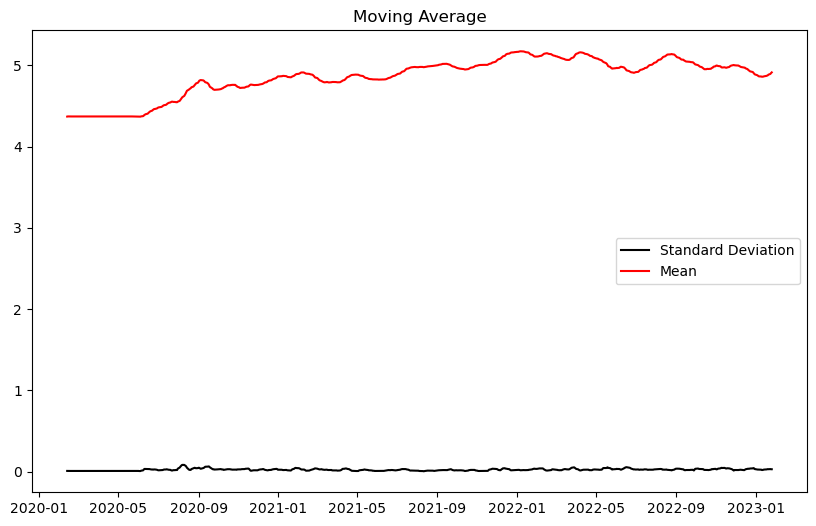

In [109]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df.Close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

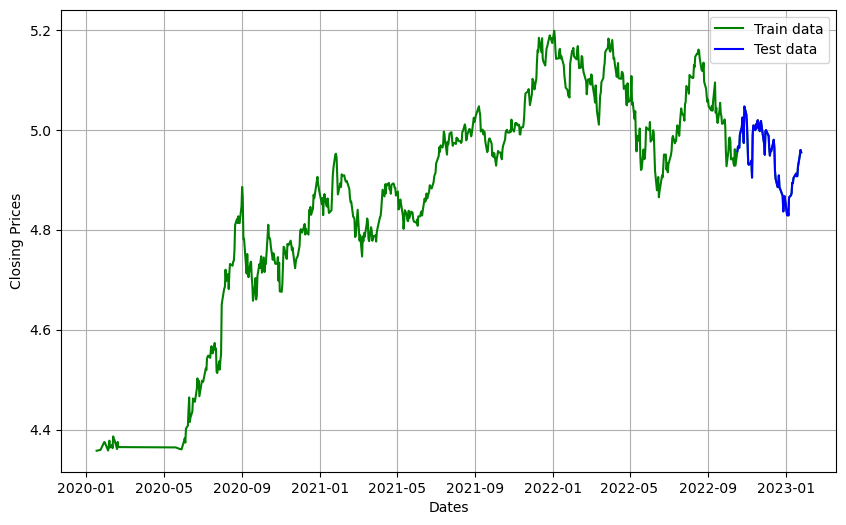

In [110]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [111]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import pmdarima as pm

In [112]:
model_autoARIMA = pm.auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3074.199, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3073.451, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3073.503, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3074.949, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3071.309, Time=0.55 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.432 seconds


TypeError: 'Series' object is not callable

In [113]:
model = ARIMA(train_data, order=(0,1,0),freq='D')  
fitted = model.fit()  
print(fitted.summary())

ValueError: The given frequency argument could not be matched to the given index.

In [94]:
start=len(train_data)
end= len(train_data)+len(test_data)-1

In [77]:
pred= fitted.predict(start=start, end=end, type='levels')

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [78]:
print(pred)

TypeError: 'Series' object is not callable

In [79]:
pred.index=df.index[start:end+1]

In [80]:
pred

date
2022-10-12    4.928346
2022-10-13    4.928346
2022-10-14    4.928346
2022-10-17    4.928346
2022-10-18    4.928346
                ...   
2023-01-13    4.928346
2023-01-17    4.928346
2023-01-18    4.928346
2023-01-19    4.928346
2023-01-20    4.928346
Name: predicted_mean, Length: 69, dtype: float64